##Data extraction

In [ ]:
countries = ["Australia", "Spain", "Canada", "Brazil", "France", "Greece"]
start_year = 1980
end_year = 2020
years = list(range(start_year, end_year+1))

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def filter_dataframe_by_year(dataframe, column_name, from_year, to_year):
  return dataframe[(dataframe[column_name] >= from_year) & (dataframe[column_name] <= to_year)]

def filter_dataframe_by_country(dataframe, column_name, countries):
  return dataframe[dataframe[column_name].isin(countries)]

In [ ]:
def interpolate_dataframe(dataframe, year_column_name, country_name_column, value_column_name, start_year, end_year):
  dataframe.set_index(year_column_name, inplace=True)
  dataframe = dataframe.reset_index()
  dataframe[year_column_name] = dataframe[year_column_name].astype('int64')
  dataframe.set_index([year_column_name, country_name_column], inplace=True)
  dataframe = dataframe.reindex(pd.MultiIndex.from_product([years, dataframe.index.levels[1]], names=[year_column_name, country_name_column]))
  dataframe[value_column_name] = dataframe.groupby(country_name_column).transform(lambda x: x.interpolate())
  dataframe = dataframe.reset_index()
  return dataframe

In [ ]:
carbon_data = pd.read_csv("drive/MyDrive/ML-lab1/co2_emissions_kt_by_country.csv")
carbon_data = carbon_data.drop("country_code", axis=1)
carbon_data

,country_name,year,value
0,Aruba,1960,11092.675000
1,Aruba,1961,11576.719000
2,Aruba,1962,12713.489000
3,Aruba,1963,12178.107000
4,Aruba,1964,11840.743000
...,...,...,...
13948,Zimbabwe,2015,12430.000305
13949,Zimbabwe,2016,11020.000458
13950,Zimbabwe,2017,10340.000153
13951,Zimbabwe,2018,12380.000114


In [ ]:
carbon_data = filter_dataframe_by_year(carbon_data, 'year', start_year, end_year)
carbon_data = filter_dataframe_by_country(carbon_data, 'country_name', countries)
carbon_data = interpolate_dataframe(carbon_data, 'year', 'country_name', "value", start_year, end_year)
carbon_data = carbon_data.rename(columns={'value': 'carbon_emission'})
carbon_data

,year,country_name,carbon_emission
0,1980,Australia,220746.066000
1,1980,Brazil,187090.340000
2,1980,Canada,443233.957000
3,1980,France,505363.938000
4,1980,Greece,51429.675000
...,...,...,...
241,2020,Brazil,434299.987793
242,2020,Canada,580210.021973
243,2020,France,300519.989014
244,2020,Greece,60000.000000


In [ ]:
gdp_data = pd.read_csv("drive/MyDrive/ML-lab1/gdp_csv.csv")
gdp_data = gdp_data.dropna()
gdp_data = gdp_data.drop("Country Code", axis=1)
gdp_data = filter_dataframe_by_year(gdp_data, 'Year', start_year, end_year)
gdp_data = filter_dataframe_by_country(gdp_data, 'Country Name', countries)
gdp_data = interpolate_dataframe(gdp_data, 'Year', 'Country Name', "Value", start_year, end_year)
gdp_data = gdp_data.rename(columns={'Value': 'GDP'})
gdp_data = gdp_data.rename(columns={'Country Name': 'country_name'})
gdp_data = gdp_data.rename(columns={'Year': 'year'})
gdp_data

,year,country_name,GDP
0,1980,Australia,1.498875e+11
1,1980,Brazil,2.350246e+11
2,1980,Canada,2.738538e+11
3,1980,France,7.035253e+11
4,1980,Greece,5.682966e+10
...,...,...,...
241,2020,Brazil,1.796187e+12
242,2020,Canada,1.529760e+12
243,2020,France,2.465454e+12
244,2020,Greece,1.926908e+11


In [ ]:
population_data = pd.read_csv("drive/MyDrive/ML-lab1/world-population.csv")
population_data = population_data.dropna()
columns_to_keep = ['country', 'Year', 'Population']
population_data = population_data.drop(columns=[col for col in population_data.columns if col not in columns_to_keep])
population_data = filter_dataframe_by_year(population_data, 'Year', start_year, end_year)
population_data = filter_dataframe_by_country(population_data, 'country', countries)
population_data = interpolate_dataframe(population_data, 'Year', 'country', "Population", start_year, end_year)
population_data = population_data.rename(columns={'country': 'country_name'})
population_data = population_data.rename(columns={'Year': 'year'})
population_data

,year,country_name,Population
0,1980,Australia,14588405.0
1,1980,Brazil,120694009.0
2,1980,Canada,24416886.0
3,1980,France,53868009.0
4,1980,Greece,9627002.0
...,...,...,...
241,2020,Brazil,212559417.0
242,2020,Canada,37742154.0
243,2020,France,65273511.0
244,2020,Greece,10423054.0


In [ ]:
energy_data = dict()
for i in countries:
  energy_data[i] = pd.read_csv("drive/MyDrive/ML-lab1/"+i+"_energy_data.csv")
energy_data_full = pd.concat(list(energy_data.values()), axis=0)
columns_to_keep = ['country', 'year', 'energy_cons_change_pct']
energy_data_full = energy_data_full.drop(columns=[col for col in energy_data_full.columns if col not in columns_to_keep])
energy_data_full = filter_dataframe_by_year(energy_data_full, 'year', start_year, end_year)
energy_data_full = filter_dataframe_by_country(energy_data_full, 'country', countries)
energy_data_full = interpolate_dataframe(energy_data_full, 'year', 'country', "energy_cons_change_pct", start_year, end_year)
energy_data_full = energy_data_full.rename(columns={'country': 'country_name'})
energy_data_full = energy_data_full.rename(columns={'Year': 'year'})
energy_data_full = energy_data_full.fillna(0)
energy_data_full["energy_cons"] = energy_data_full["energy_cons_change_pct"].cumsum()*population_data['Population']
energy_data_full = energy_data_full.drop(columns=["energy_cons_change_pct"])
energy_data_full["energy_cons"] + energy_data_full["energy_cons"].min()
energy_data_full

,year,country_name,energy_cons
0,1980,Australia,5.412298e+06
1,1980,Brazil,2.894242e+08
2,1980,Canada,1.053344e+08
3,1980,France,1.620888e+08
4,1980,Greece,1.992789e+07
...,...,...,...
241,2020,Brazil,7.478542e+10
242,2020,Canada,1.306426e+10
243,2020,France,2.194065e+10
244,2020,Greece,3.335325e+09


In [ ]:
data = pd.merge(
    pd.merge(
        pd.merge(carbon_data, gdp_data, on=['country_name', 'year'], how='inner'),
        population_data,
        on=['country_name', 'year'],
        how='inner'),
    energy_data_full,
    on=['country_name', 'year'],
    how='inner')
data.set_index('year', inplace=True)
data

,country_name,carbon_emission,GDP,Population,energy_cons
year,,,,,
1980,Australia,220746.066000,1.498875e+11,14588405.0,5.412298e+06
1980,Brazil,187090.340000,2.350246e+11,120694009.0,2.894242e+08
1980,Canada,443233.957000,2.738538e+11,24416886.0,1.053344e+08
1980,France,505363.938000,7.035253e+11,53868009.0,1.620888e+08
1980,Greece,51429.675000,5.682966e+10,9627002.0,1.992789e+07
...,...,...,...,...,...
2020,Brazil,434299.987793,1.796187e+12,212559417.0,7.478542e+10
2020,Canada,580210.021973,1.529760e+12,37742154.0,1.306426e+10
2020,France,300519.989014,2.465454e+12,65273511.0,2.194065e+10


<ipython-input-12-88b5bf393427>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


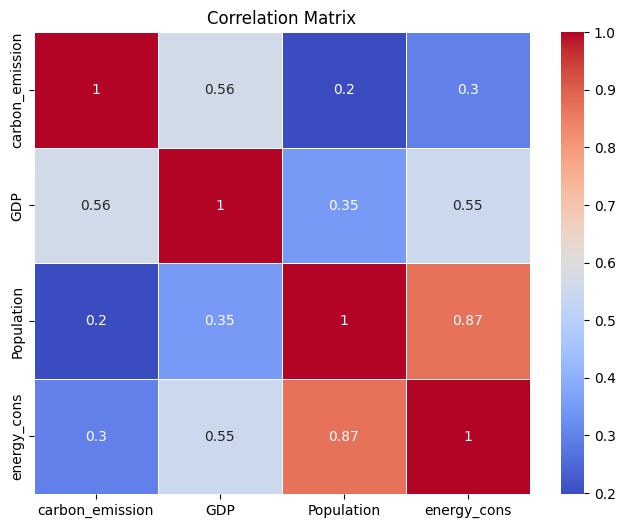

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

##Network

In [ ]:
import keras
from keras.layers import Dense, Activation, Dropout
from keras.layers import TimeDistributed, Conv1D, AveragePooling1D, Conv2D, AveragePooling2D, BatchNormalization, Flatten
from keras.layers import LSTM
from keras.models import Sequential
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
x_size=9
y_size=1

def print_loss(hist):
  plt.plot(hist.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train'], loc='upper left')

  plt.tight_layout()
  plt.show()

def plot_test_real(x, real, preds, param, title):
  plt.plot(x, real, label="real")
  plt.plot(x, preds,  label="predicted")
  plt.ylabel(param)
  plt.xlabel('Year')
  plt.title(title)
  plt.legend(loc="upper right")
  plt.show()

In [ ]:
def getNetwork(input_shape):

  model = Sequential()

  model.add(Flatten(input_shape = input_shape))
  model.add(Dense(100, activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation="relu"))
  model.add(Dense(1, activation="linear"))
  opt = keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss="mse", optimizer=opt)

  return model

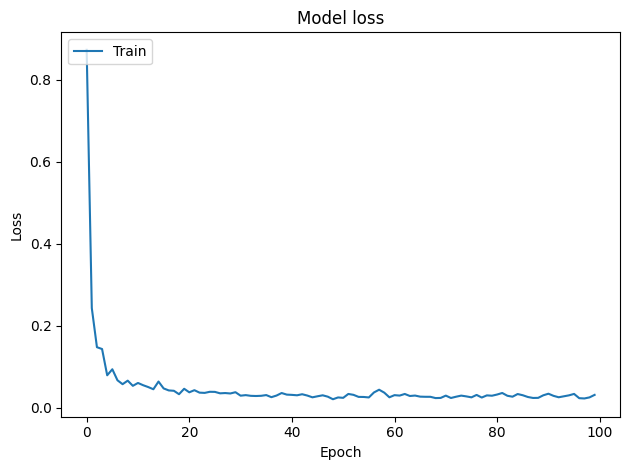

1/1 [==============================] - 0s 374ms/step


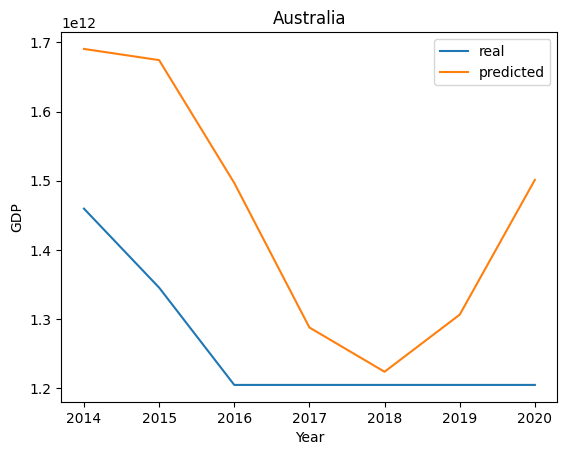

1/1 [==============================] - 0s 208ms/step


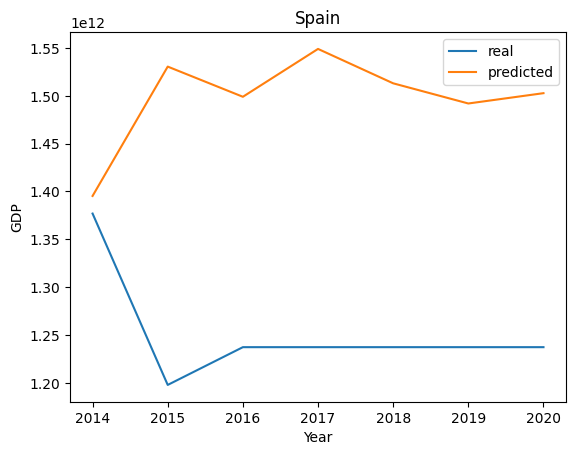

1/1 [==============================] - 0s 209ms/step


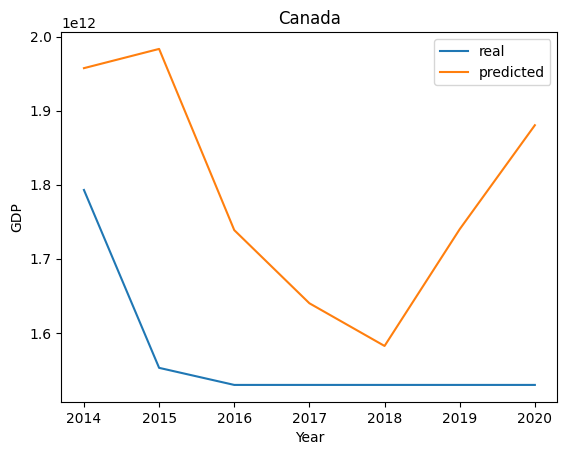

1/1 [==============================] - 0s 132ms/step


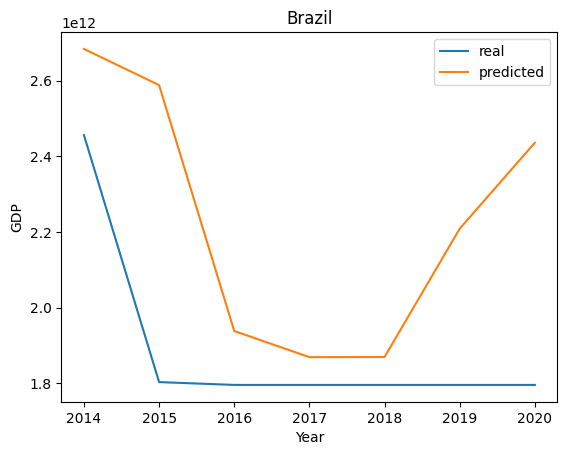

1/1 [==============================] - 0s 62ms/step


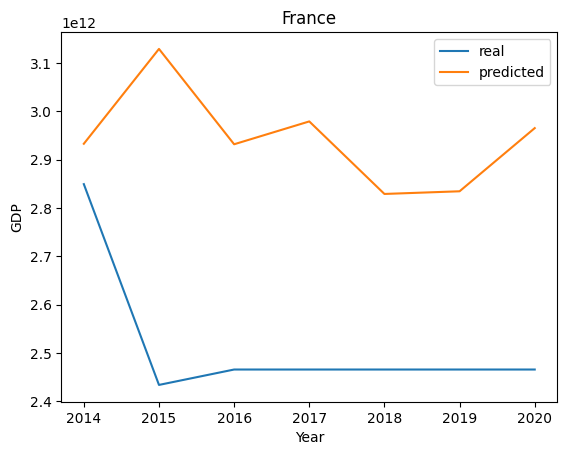

1/1 [==============================] - 0s 37ms/step


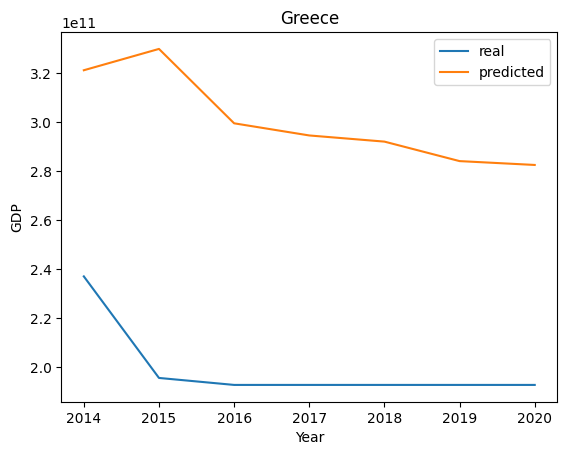

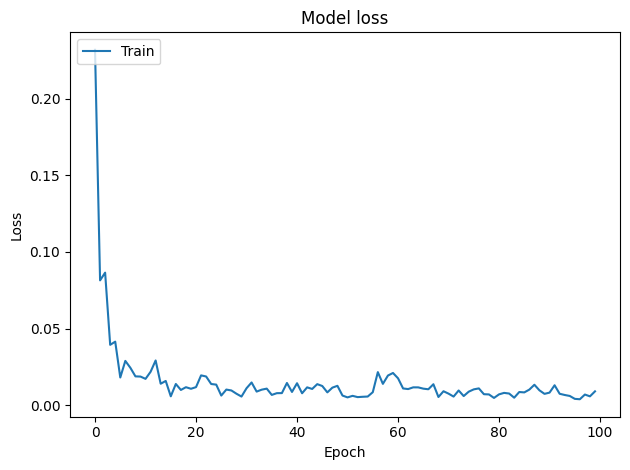

1/1 [==============================] - 0s 85ms/step


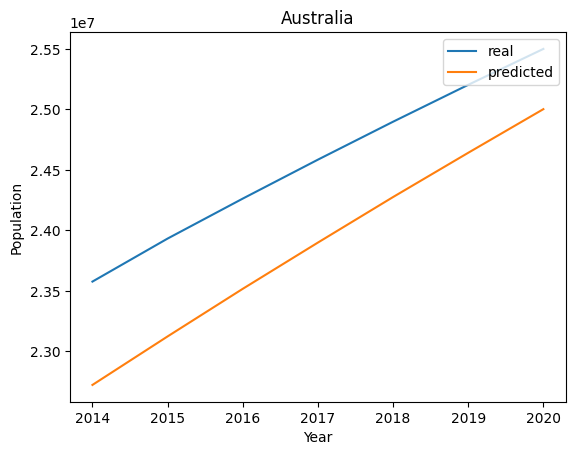

1/1 [==============================] - 0s 38ms/step


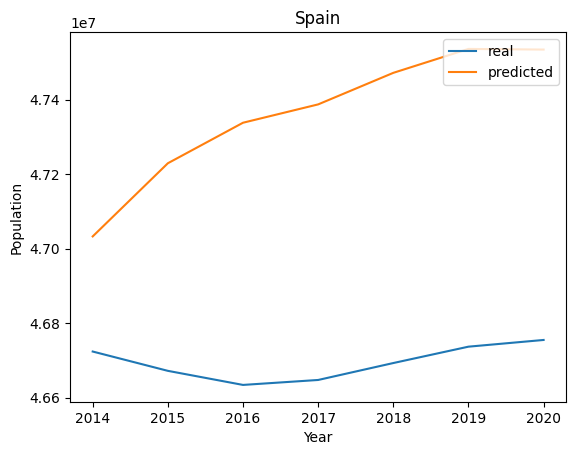

1/1 [==============================] - 0s 40ms/step


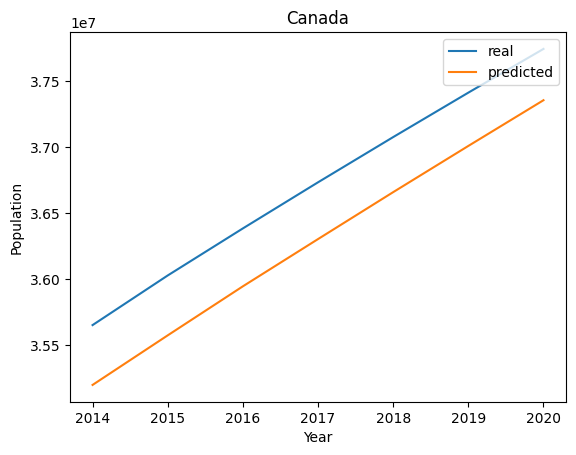

1/1 [==============================] - 0s 38ms/step


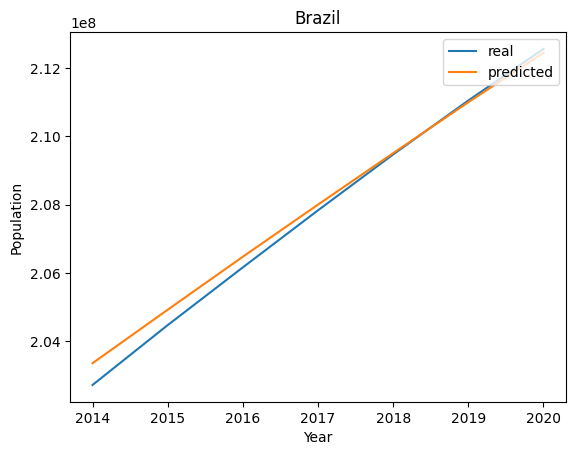

1/1 [==============================] - 0s 36ms/step


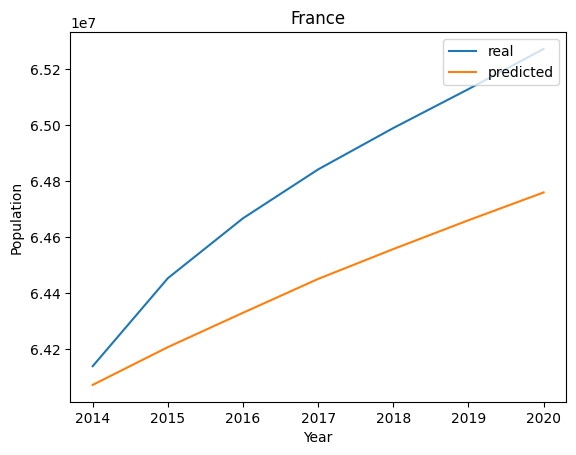

1/1 [==============================] - 0s 43ms/step


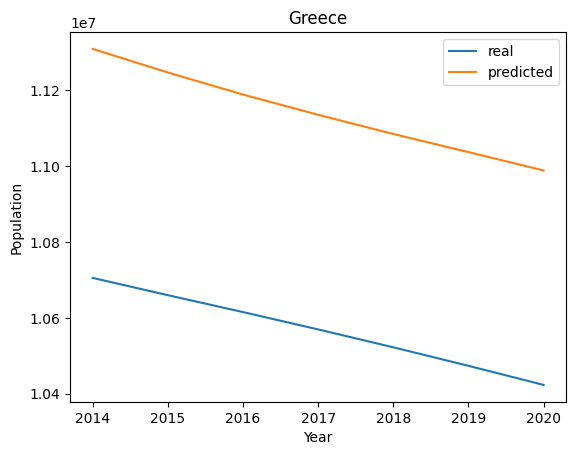

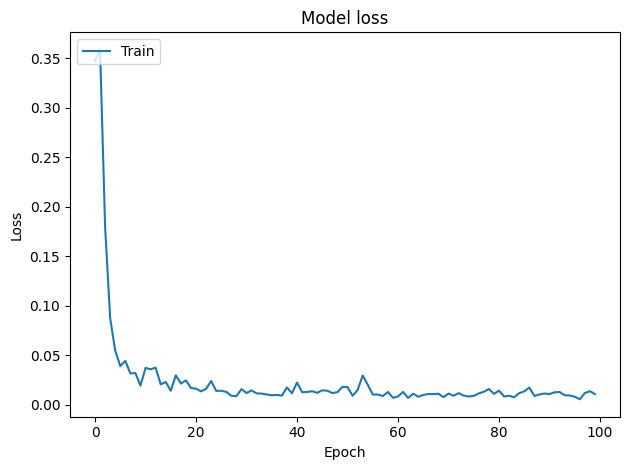

1/1 [==============================] - 0s 81ms/step


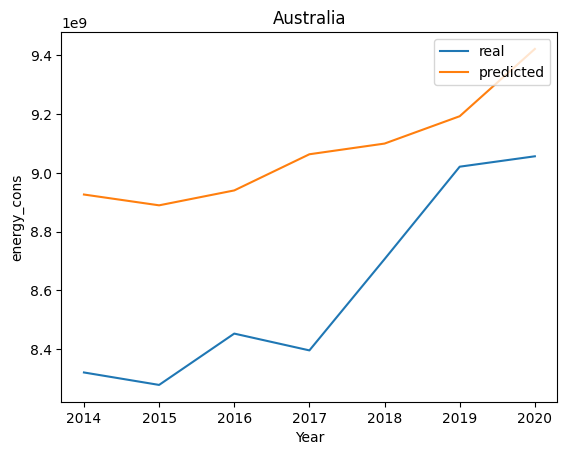

1/1 [==============================] - 0s 59ms/step


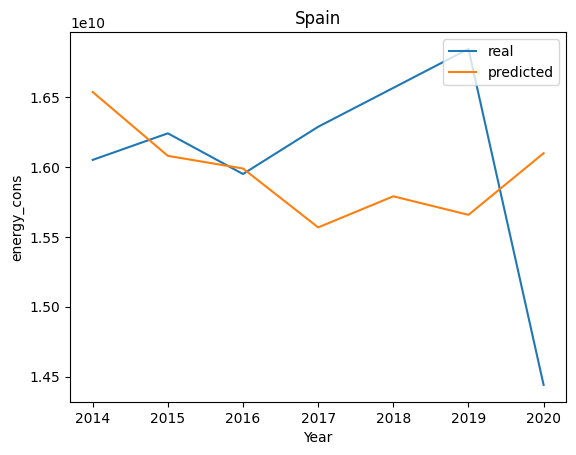

1/1 [==============================] - 0s 44ms/step


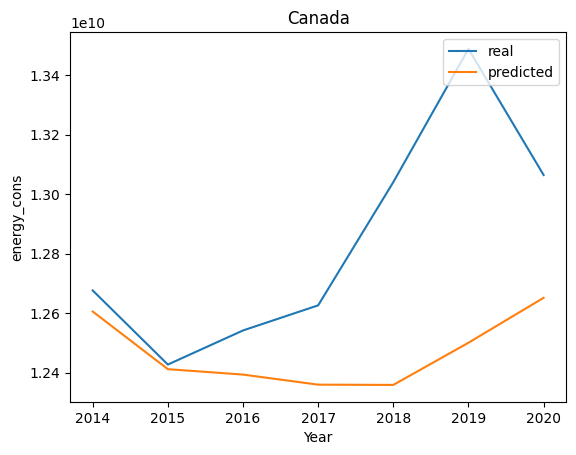

1/1 [==============================] - 0s 42ms/step


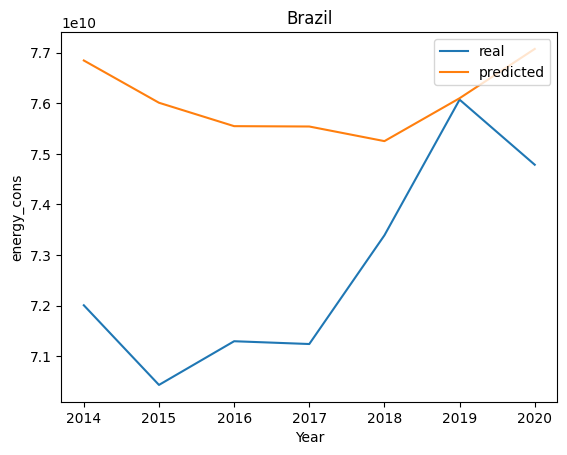

1/1 [==============================] - 0s 43ms/step


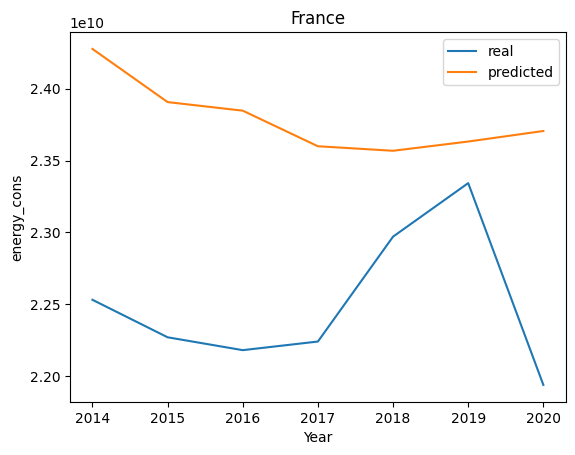

1/1 [==============================] - 0s 42ms/step


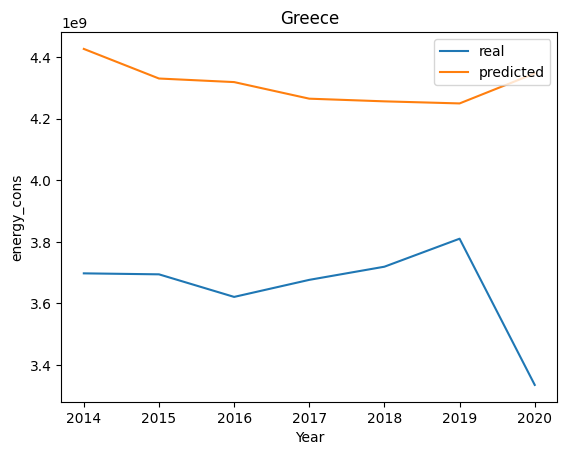

In [ ]:
from sklearn.preprocessing import StandardScaler

params = ["GDP", "Population", "energy_cons"]

x_dict = dict()
y_dict = dict()
scaler = dict()
for p in params:
  scaler[p] = StandardScaler()
  data[p] = scaler[p].fit_transform(data[p].to_numpy().reshape(-1, 1))
models = dict()
for param in params:

  x_dict[param] = []
  y_dict[param] = []

  x_train = dict()
  y_train = dict()
  x_test = dict()
  y_test = dict()

  preds = dict()
  real = dict()

  for country in countries:

    for i in range(len(years) - (x_size+y_size)+1):
        a = data[data['country_name'] == country][param][i:(i + x_size)]
        x_dict[param] = list(x_dict[param])
        x_dict[param].append(a.tolist())
        b = data[data['country_name'] == country][param][(i + x_size):(i + x_size + y_size)]
        y_dict[param] = list(y_dict[param])
        y_dict[param].append(b.tolist())

    x_dict[param], y_dict[param]  = np.array(x_dict[param]), np.array(y_dict[param])

    train_size = int(0.8*len(x_dict[param]))
    x_train[country] = x_dict[param].tolist()[:train_size]
    y_train[country] = y_dict[param].tolist()[:train_size]

    x_test[country] = x_dict[param].tolist()[train_size:]
    y_test[country] = y_dict[param].tolist()[train_size:]
    x_dict[param] = []
    y_dict[param] = []

  models[param] = getNetwork((9, 1))
  tr_x = []
  tr_y = []
  for country in countries:
    tr_x.extend(x_train[country])
    tr_y.extend(y_train[country])
  history = models[param].fit(tr_x, tr_y, epochs=100, verbose=0)

  print_loss(history)

  for country in countries:
    preds[country] = models[param].predict(x_test[country])

    real[country] = scaler[param].inverse_transform(y_test[country])
    preds[country] = scaler[param].inverse_transform(preds[country])
    plot_test_real(years[-x_size+2:], real[country], preds[country], param, country)

In [ ]:
scaler["carbon_emission"] = StandardScaler()
data["carbon_emission"] = scaler["carbon_emission"].fit_transform(data["carbon_emission"].to_numpy().reshape(-1, 1))

In [ ]:
new_years = [i for i in range(2021, 2036)]
params_full = ["GDP", "Population", "energy_cons", "carbon_emission"]
values = dict()
for param in params_full:
  values[param] = dict()
  for country in countries:
    values[param][country] = data[data['country_name'] == country][param].tolist()

for param in params:
   for country in countries:
      for year in new_years:
        x = values[param][country][-x_size:]
        y = models[param].predict(np.asarray([x]))
        values[param][country].append(y[0][0])


1/1 [==============================] - 0s 22ms/step


In [ ]:
def show_for_countries(label):
  preds = dict()
  for country in countries:
    preds[country] = scaler[label].inverse_transform(np.asarray(values[label][country]).reshape(-1, 1))
    plt.plot([i for i in range(1980, 2036)], preds[country], label = country)
  plt.ylabel(label)
  plt.xlabel('Year')
  plt.legend(loc="upper left")
  plt.show()

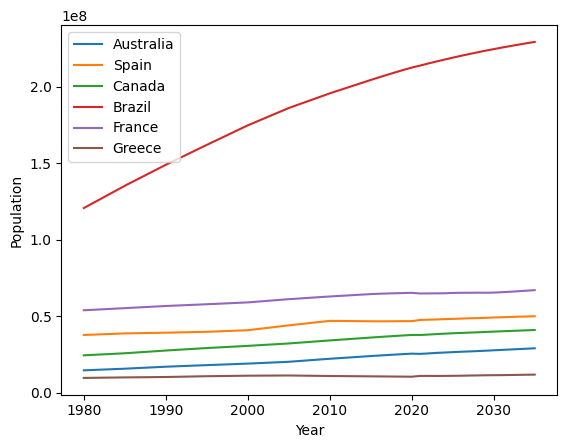

In [ ]:
show_for_countries("Population")

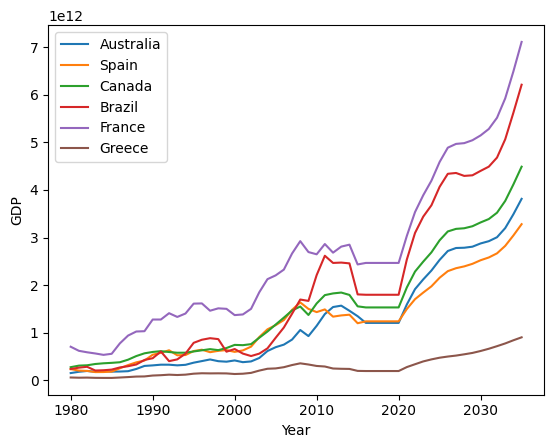

In [ ]:
show_for_countries("GDP")

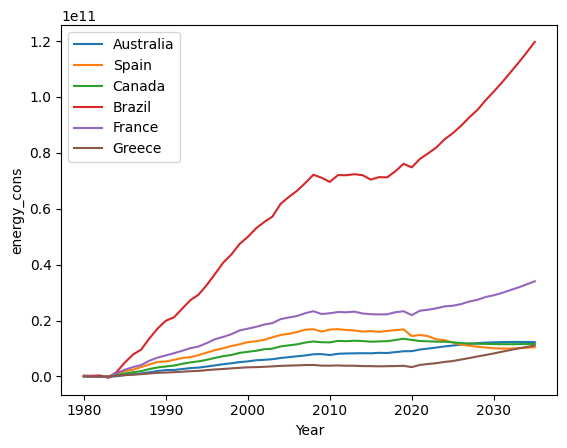

In [ ]:
show_for_countries("energy_cons")

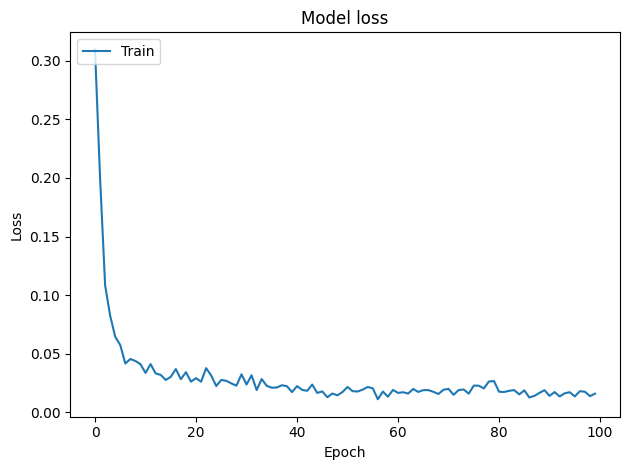

1/1 [==============================] - 0s 81ms/step
[[[-0.27140884384136926, -0.6420375196137083, -0.38535050665503096, 0.47479159674741617], [-0.19755207716427528, -0.6349020251245308, -0.36841284741419844, 0.5134989954972243], [-0.051794567063880935, -0.6277665306353533, -0.352388530379949, 0.5870432062478239], [0.2248776106750051, -0.6206310361461759, -0.32886594320655194, 0.6099092870026116], [0.04895821292123143, -0.6134955416569985, -0.3255278323485139, 0.6554264159150249], [0.34503634874036054, -0.6063600471678209, -0.34434866530938824, 0.5998740678824959], [0.6849984884434036, -0.5999406372886409, -0.3197342956445389, 0.5915591095397235], [0.8876433790749814, -0.5935212274094609, -0.31351827845953656, 0.5957882297849341], [0.927426574609305, -0.5871018175302808, -0.31070227736116496, 0.5478339918541656]], [[-0.19755207716427528, -0.6349020251245308, -0.36841284741419844, 0.5134989954972243], [-0.051794567063880935, -0.6277665306353533, -0.352388530379949, 0.5870432062478239], [

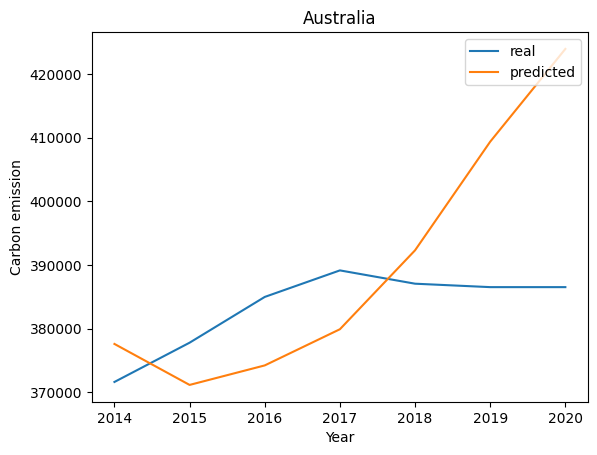

1/1 [==============================] - 0s 42ms/step
[[[0.36480113684501486, -0.2116165102229772, 0.06917470737515487, 0.33436962326115954], [0.5120452176961481, -0.2011021742784511, 0.10361091009171852, 0.2718642629183761], [0.8068628762649849, -0.19058783833392498, 0.15010934291105862, 0.36433199847385755], [1.0205382754486432, -0.18007350238939873, 0.15988434657342102, 0.14635172658895904], [0.8339825599139933, -0.1695591664448726, 0.11299512575341633, -0.11728895635600868], [0.741356425678372, -0.15904483050034648, 0.15209915330761037, -0.2193618458372751], [0.8188395306474472, -0.15998035585140044, 0.16015460902149184, -0.21111863794401514], [0.6101403475248454, -0.1609158812024545, 0.1443653045354047, -0.2478907433193116], [0.645601425853777, -0.16185140655350846, 0.1355116406514797, -0.4375571503193421]], [[0.5120452176961481, -0.2011021742784511, 0.10361091009171852, 0.2718642629183761], [0.8068628762649849, -0.19058783833392498, 0.15010934291105862, 0.36433199847385755], [1.020

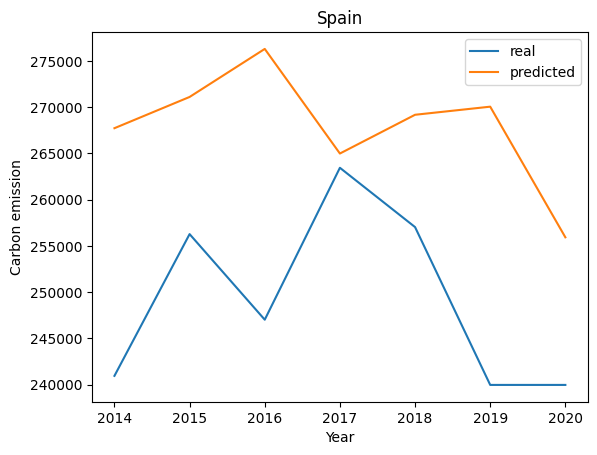

1/1 [==============================] - 0s 37ms/step
[[[0.381384048794943, -0.425644875553614, -0.15557461466412653, 1.7574417887331837], [0.5818599521334321, -0.41848368642515005, -0.13596102441313557, 1.6965134070200873], [0.7871464562443694, -0.41132249729668613, -0.10102752856590776, 1.9194394286398528], [0.9026549755383629, -0.40416130816822216, -0.07993081853666616, 1.7677633533972417], [0.6583648143894913, -0.3970001190397582, -0.09405117734210473, 1.5588151068475045], [0.9909577610237302, -0.3898389299112942, -0.0979285504981379, 1.6712817489450809], [1.2314119311754426, -0.38305378305646914, -0.06817611279697981, 1.7593051129068131], [1.280332018780196, -0.376268636201644, -0.07380434291496596, 1.73722784959392], [1.305504190662919, -0.3694834893468188, -0.06487958824145763, 1.8049655239668756]], [[0.5818599521334321, -0.41848368642515005, -0.13596102441313557, 1.6965134070200873], [0.7871464562443694, -0.41132249729668613, -0.10102752856590776, 1.9194394286398528], [0.90265497

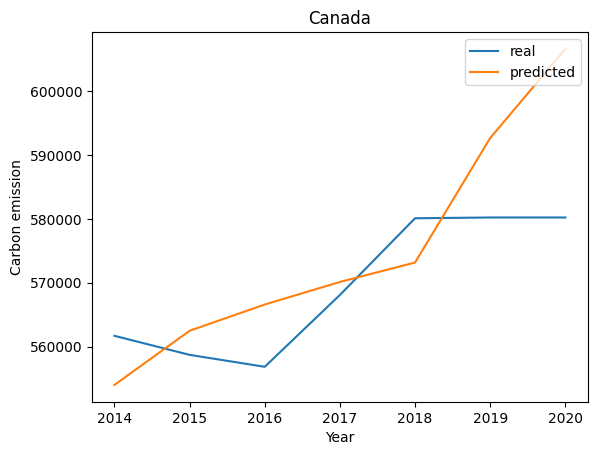

1/1 [==============================] - 0s 66ms/step
[[[0.0001788301057220697, 2.3540195815654585, 2.737035739357371, 0.19953871605263895], [0.29667134017407687, 2.38863488254192, 2.8574238290457545, 0.22770908003848828], [0.693957825795305, 2.4232501835183817, 3.0078866827462507, 0.3491357782703432], [1.1040039673842235, 2.4578654844948424, 3.1700634487826416, 0.500166536970079], [1.0644667863305108, 2.492480785471304, 3.112999386920402, 0.330785600807448], [1.8082046107715384, 2.5270960864477656, 3.031332320848128, 0.6743499407199067], [2.367299446454039, 2.558720186216293, 3.163656579617173, 0.8204347309334121], [2.16002144404725, 2.59034428598482, 3.1614868740438897, 1.0779110002586505], [2.170478131302565, 2.6219683857533473, 3.181315549435329, 1.3116608396890634]], [[0.29667134017407687, 2.38863488254192, 2.8574238290457545, 0.22770908003848828], [0.693957825795305, 2.4232501835183817, 3.0078866827462507, 0.3491357782703432], [1.1040039673842235, 2.4578654844948424, 3.170063448782

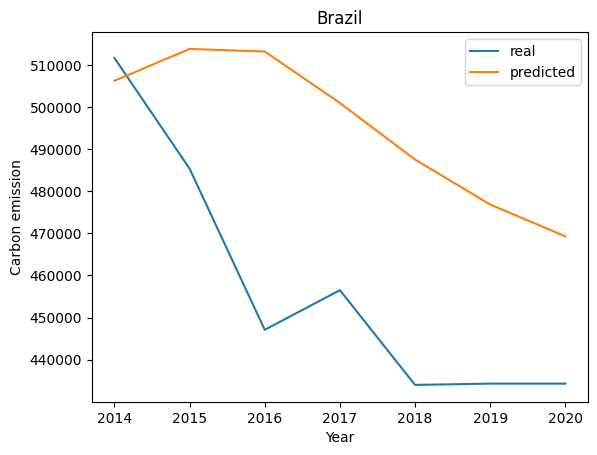

1/1 [==============================] - 0s 57ms/step
[[[1.8010767793881126, 0.09712725679291033, 0.3881057941585767, 0.5505578839192022], [1.967616972080701, 0.10348015525336395, 0.41669047155821315, 0.4852568810618693], [2.4316886744470105, 0.10983305371381756, 0.47151643492674267, 0.4227515207190859], [2.78904541417503, 0.11618595217427105, 0.5099750804030073, 0.38805820961732], [2.473847533869153, 0.12253885063472467, 0.4560878383595429, 0.2858420379883977], [2.4093493113925097, 0.12889174909517828, 0.4706091251898056, 0.31487253236291474], [2.705612154797901, 0.13457399797179267, 0.49426091468299616, 0.22426855848380228], [2.456811913532873, 0.1402562468484071, 0.4898831226960887, 0.247779737030089], [2.631260696884545, 0.1459384957250215, 0.502349014990191, 0.24878314956641973]], [[1.967616972080701, 0.10348015525336395, 0.41669047155821315, 0.4852568810618693], [2.4316886744470105, 0.10983305371381756, 0.47151643492674267, 0.4227515207190859], [2.78904541417503, 0.1161859521742710

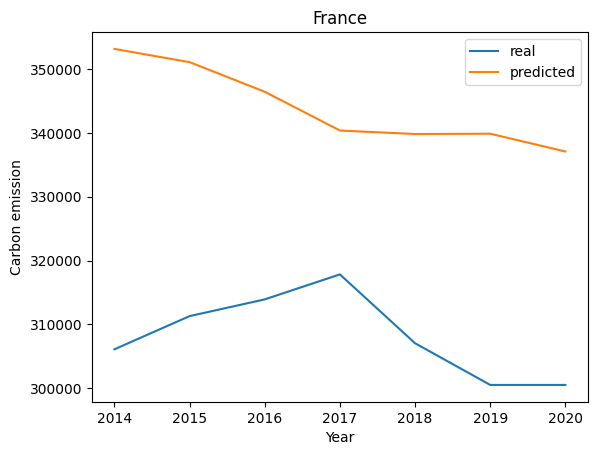

1/1 [==============================] - 0s 60ms/step
[[[-0.883555673108303, -0.8036896772984112, -0.5502071692415402, -1.447247960353991], [-0.8485070860803643, -0.8049070817972872, -0.5459350837954992, -1.4562080164882698], [-0.7864934346643822, -0.8061244862961631, -0.5390943660805203, -1.430331369997442], [-0.737131355227515, -0.8073418907950389, -0.5379162320540157, -1.4582867013861225], [-0.7707055326447894, -0.8085592952939148, -0.5503868784638389, -1.4989295575739694], [-0.8127597102342953, -0.8097766997927908, -0.5510445857409787, -1.5502527306734404], [-0.8286319427778922, -0.8105995601445449, -0.5473052911281275, -1.5719718979928776], [-0.886455032137821, -0.8114224204962992, -0.5523274062345809, -1.6039414264052863], [-0.8944279034231141, -0.8122452808480533, -0.5522602959540484, -1.6584901978379607]], [[-0.8485070860803643, -0.8049070817972872, -0.5459350837954992, -1.4562080164882698], [-0.7864934346643822, -0.8061244862961631, -0.5390943660805203, -1.430331369997442], [-0.

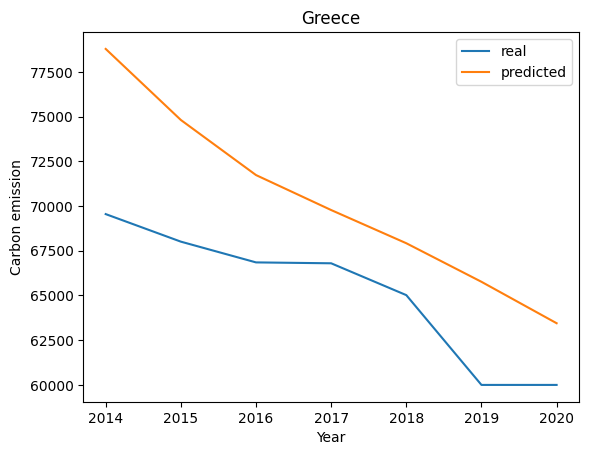

In [ ]:
x_dict = []
y_dict = []

x_train = dict()
y_train = dict()
x_test = dict()
y_test = dict()

preds = dict()
real = dict()

for country in countries:

  for i in range(len(years) - (x_size+y_size)+1):
      a = data[data['country_name'] == country][params_full][i:(i + x_size)]
      x_dict = list(x_dict)
      x_dict.append(a)
      b = data[data['country_name'] == country]["carbon_emission"][(i + x_size):(i + x_size + y_size)]
      y_dict = list(y_dict)
      y_dict.append(b.tolist())

  x_dict, y_dict  = np.array(x_dict), np.array(y_dict)

  train_size = int(0.8*len(x_dict))
  x_train[country] = x_dict.tolist()[:train_size]
  y_train[country] = y_dict.tolist()[:train_size]

  x_test[country] = x_dict.tolist()[train_size:]
  y_test[country] = y_dict.tolist()[train_size:]
  x_dict = []
  y_dict = []

model = getNetwork((9, 4))
tr_x = []
tr_y = []
for country in countries:
  tr_x.extend(x_train[country])
  tr_y.extend(y_train[country])

history = model.fit(tr_x, tr_y, epochs=100, verbose=0)

print_loss(history)

for country in countries:
  preds[country] = model.predict(x_test[country])
  print(x_test[country])
  print(preds[country])
  print(y_test[country])
  real[country] = scaler["carbon_emission"].inverse_transform(y_test[country])
  preds[country] = scaler["carbon_emission"].inverse_transform(preds[country])
  plot_test_real(years[-x_size+2:], real[country], preds[country], "Carbon emission", country)

In [ ]:
for country in countries:
      for year in new_years:
        x = []
        ln = len(values["carbon_emission"][country])-1
        for ind in range(ln - x_size, ln):
          x.append([values[p][country][ind] for p in params_full])

        y = model.predict(np.asarray([x]))
        values["carbon_emission"][country].append(y[0][0])

1/1 [==============================] - 0s 21ms/step


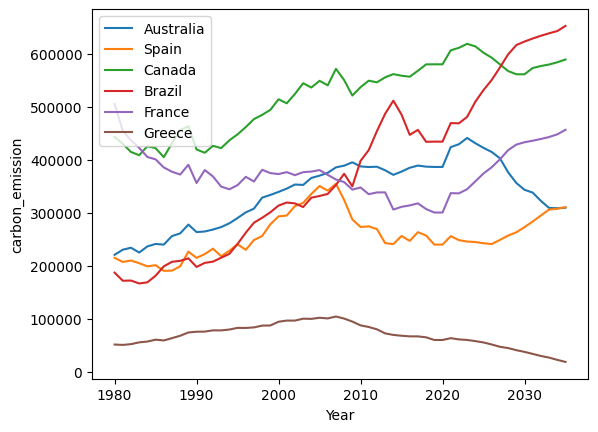

In [ ]:
show_for_countries("carbon_emission")